In [79]:
import sys
sys.path.append("../")

from __init__ import *
from data_tools import *
from testing import *

In [135]:
path_to_dir = '/Users/nathan/Desktop/v2/'

harmonic = 'Harmonic/'
bathtub = 'Bathtub/'

path_to_harmonic = path_to_dir + harmonic
path_to_bathtub = path_to_dir + bathtub

harmonic_list = glob.glob(path_to_harmonic + '/**/*.h5', recursive=True)
new_harmonic_list = []

for f in harmonic_list:

    suffix = f.split('nathan/')[-1]
    true_path = '../../../../' + suffix
    new_harmonic_list.append(true_path)
    
bathtub_list = glob.glob(path_to_bathtub + '/**/*.h5', recursive=True)
new_bathtub_list = []

for f in bathtub_list:
    suffix = f.split('nathan/')[-1]
    true_path = '../../../../' + suffix
    new_bathtub_list.append(true_path)


print(new_harmonic_list)

['../../../../Desktop/v2/Harmonic/89.5deg/out_aa757e34-0546-4212-ba7e-7a0be7d619bb.h5', '../../../../Desktop/v2/Harmonic/89.5deg/out_d58b7bfc-4ccd-4afa-95ba-1548ab581f8d.h5', '../../../../Desktop/v2/Harmonic/89.5deg/out_e4c5fbbf-d0d4-42a2-8b22-b24f93af0176.h5', '../../../../Desktop/v2/Harmonic/89.5deg/out_51db499d-c8ea-4cce-884b-d9c3e3f44ed1.h5', '../../../../Desktop/v2/Harmonic/89.5deg/out_b2063233-e257-402e-be07-7c4508124a92.h5', '../../../../Desktop/v2/Harmonic/88.0deg/out_b6904a31-7e4e-4282-8ac5-0715b65af626.h5', '../../../../Desktop/v2/Harmonic/88.0deg/out_cebcab3e-1612-47f6-af3b-15da49f5e73f.h5', '../../../../Desktop/v2/Harmonic/88.0deg/out_5da408a5-8298-43ac-8285-e8fae2272888.h5', '../../../../Desktop/v2/Harmonic/88.0deg/out_c6d3ddf9-aa42-491c-994b-9787010a4665.h5', '../../../../Desktop/v2/Harmonic/88.0deg/out_5c7aedf7-ef5c-4204-b7a0-8ff4131753e8.h5', '../../../../Desktop/v2/Harmonic/88.0deg/out_c44f15c4-e4d5-4abe-8af7-e53a5ee0feec.h5', '../../../../Desktop/v2/Harmonic/88.0deg/o

In [131]:
file__ = '../../../../Desktop/v2/Harmonic/87.0deg/out_75420257-534c-43e9-8ffc-8c379e45ac5f.h5'

os.getcwd()

# a is the attributes
# b is the keys
# c is the data

signal_strings, b, data = get_attributes(file__, full_path=True)
filename = file__.split('/')[-1]
trap_type = file__.split('/')[-3]

for i in range(len(b)):
    print(np.allclose(data[0][i], data[1][i]))
    
signal_strings[0]

True
True
False
True
True
True
True
True
True
True
True
True
True


'signal1'

In [ ]:
harmonic_list

In [143]:
frame_strings = [           'File_name',
                               'signal',
                                 'trap',   
                        'B_bkg [Tesla]',
          'Cyclotron frequency [Hertz]',
'Downmixed cyclotron frequency [Hertz]',
                          'Energy [eV]',
                 'LO frequency [Hertz]',
                'Pitch angle [degrees]',
           'Starting position [metres]',
    'Starting velocity [metres/second]',
                  'Time step [seconds]',
           'Waveguide impedance [Ohms]',
                        'i_coil [Amps]',
                      'r_coil [metres]',
                        'r_wg [metres]'
]

for i, f in enumerate(new_harmonic_list):
    signal_strings, b, data = get_attributes(f, full_path=True)
    filename = f.split('/')[-1]
    trap_type = f.split('/')[-3]
    vars = {
        'File_name': filename,
        'signal': signal_strings[0],
        'trap': trap_type,
        'B_bkg': data[0][0],
        'f_cyc': data[0][1],
        'f_cyc_d': data[0][2],
        'energy': data[0][3],
        'f_lo': data[0][4],
        'pitch_angle': data[0][5],
        'r_0': [data[0][6]],
        'v_0': [data[0][7]],
        'dt': data[0][8],
        'Z_wg': data[0][9],
        'i_coil': data[0][10],
        'r_coil': data[0][11],
        'r_wg': data[0][12]
    }
    
    new_frame = pd.DataFrame(vars)
    
    if i == 0:
      frame = pd.DataFrame(vars)
    
    else:
      frame = pd.concat([frame, new_frame], axis=0)
      
    if i % 100 == 0:
        print(i)

frame.columns = frame_strings

frame.to_csv('../data/simulations_truth/harmonic.csv', index=False)



0
100
200
300
400
500
600
700


In [137]:
new_frame

,File_name,signal,trap,B_bkg,f_cyc,f_cyc_d,energy,f_lo,pitch_angle,r_0,v_0,dt,Z_wg,i_coil,r_coil,r_wg
0,out_75420257-534c-43e9-8ffc-8c379e45ac5f.h5,signal1,Harmonic,0.7034,1.893956e+10,1.902715e+08,18575.0,1.874929e+10,87.0,"[0.002143396171076831, 0.0005883966386415551, ...","[13714809.340992382, -77389913.80504172, -4119...",1.000000e-09,593.915259,108.225361,0.02,0.006


In [139]:
df

,File_name,signal,trap,B_bkg [Tesla],Cyclotron frequency [Hertz],Downmixed cyclotron frequency [Hertz],Energy [eV],LO frequency [Hertz],Pitch angle [degrees],Starting position [metres],Starting velocity [metres/second],Time step [seconds],Waveguide impedance [Ohms],i_coil [Amps],r_coil [metres],r_wg [metres]
0,out_75420257-534c-43e9-8ffc-8c379e45ac5f.h5,signal1,Harmonic,0.7034,1.893956e+10,1.902715e+08,18575.0,1.874929e+10,87.0,"[0.002143396171076831, 0.0005883966386415551, ...","[13714809.340992382, -77389913.80504172, -4119...",1.000000e-09,593.915259,108.225361,0.02,0.006
1,out_aa757e34-0546-4212-ba7e-7a0be7d619bb.h5,signal1,Harmonic,0.7034,1.890781e+10,1.585195e+08,18575.0,1.874929e+10,89.5,"[-7.691596072283725e-05, 0.0019482617427328411...","[78000971.46601099, 10470811.895703286, 686810...",1.000000e-09,595.403519,108.225361,0.02,0.006


In [ ]:
frame_strings = [           'File_name',
                               'signal',
                                 'trap',   
                        'B_bkg [Tesla]',
          'Cyclotron frequency [Hertz]',
'Downmixed cyclotron frequency [Hertz]',
                          'Energy [eV]',
                 'LO frequency [Hertz]',
                'Pitch angle [degrees]',
           'Starting position [metres]',
    'Starting velocity [metres/second]',
                  'Time step [seconds]',
           'Waveguide impedance [Ohms]',
                        'i_coil [Amps]',
                      'r_coil [metres]',
                        'r_wg [metres]'
]

'../../../../Desktop/v2/Harmonic/87.0deg/out_3af83d7c-7ce4-47f9-8a63-f965cc807fd8.h5'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Example dataframe `df`
# Pairplot for continuous variables
sns.pairplot(df[['B_bkg [Tesla]', 'Cyclotron frequency [Hertz]', 'Downmixed cyclotron frequency [Hertz]', 'Energy [eV]', 'LO frequency [Hertz]']])
plt.show()

# Correlation heatmap
corr = df[['B_bkg', 'Cyclotron frequency [Hertz]', 'f_cyc_d', 'energy', 'f_lo']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# 3D scatter plot for r_0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r_0 = np.array(df['r_0'].tolist())  # Assuming tuples in a column
ax.scatter(r_0[:, 0], r_0[:, 1], r_0[:, 2], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Quiver plot for r_0 and v_0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r_0 = np.array(df['r_0'].tolist())
v_0 = np.array(df['v_0'].tolist())
ax.quiver(r_0[:, 0], r_0[:, 1], r_0[:, 2], v_0[:, 0], v_0[:, 1], v_0[:, 2])
plt.show()


KeyError: "None of [Index(['B_bkg', 'f_cyc', 'f_cyc_d', 'energy', 'f_lo'], dtype='object')] are in the [columns]"

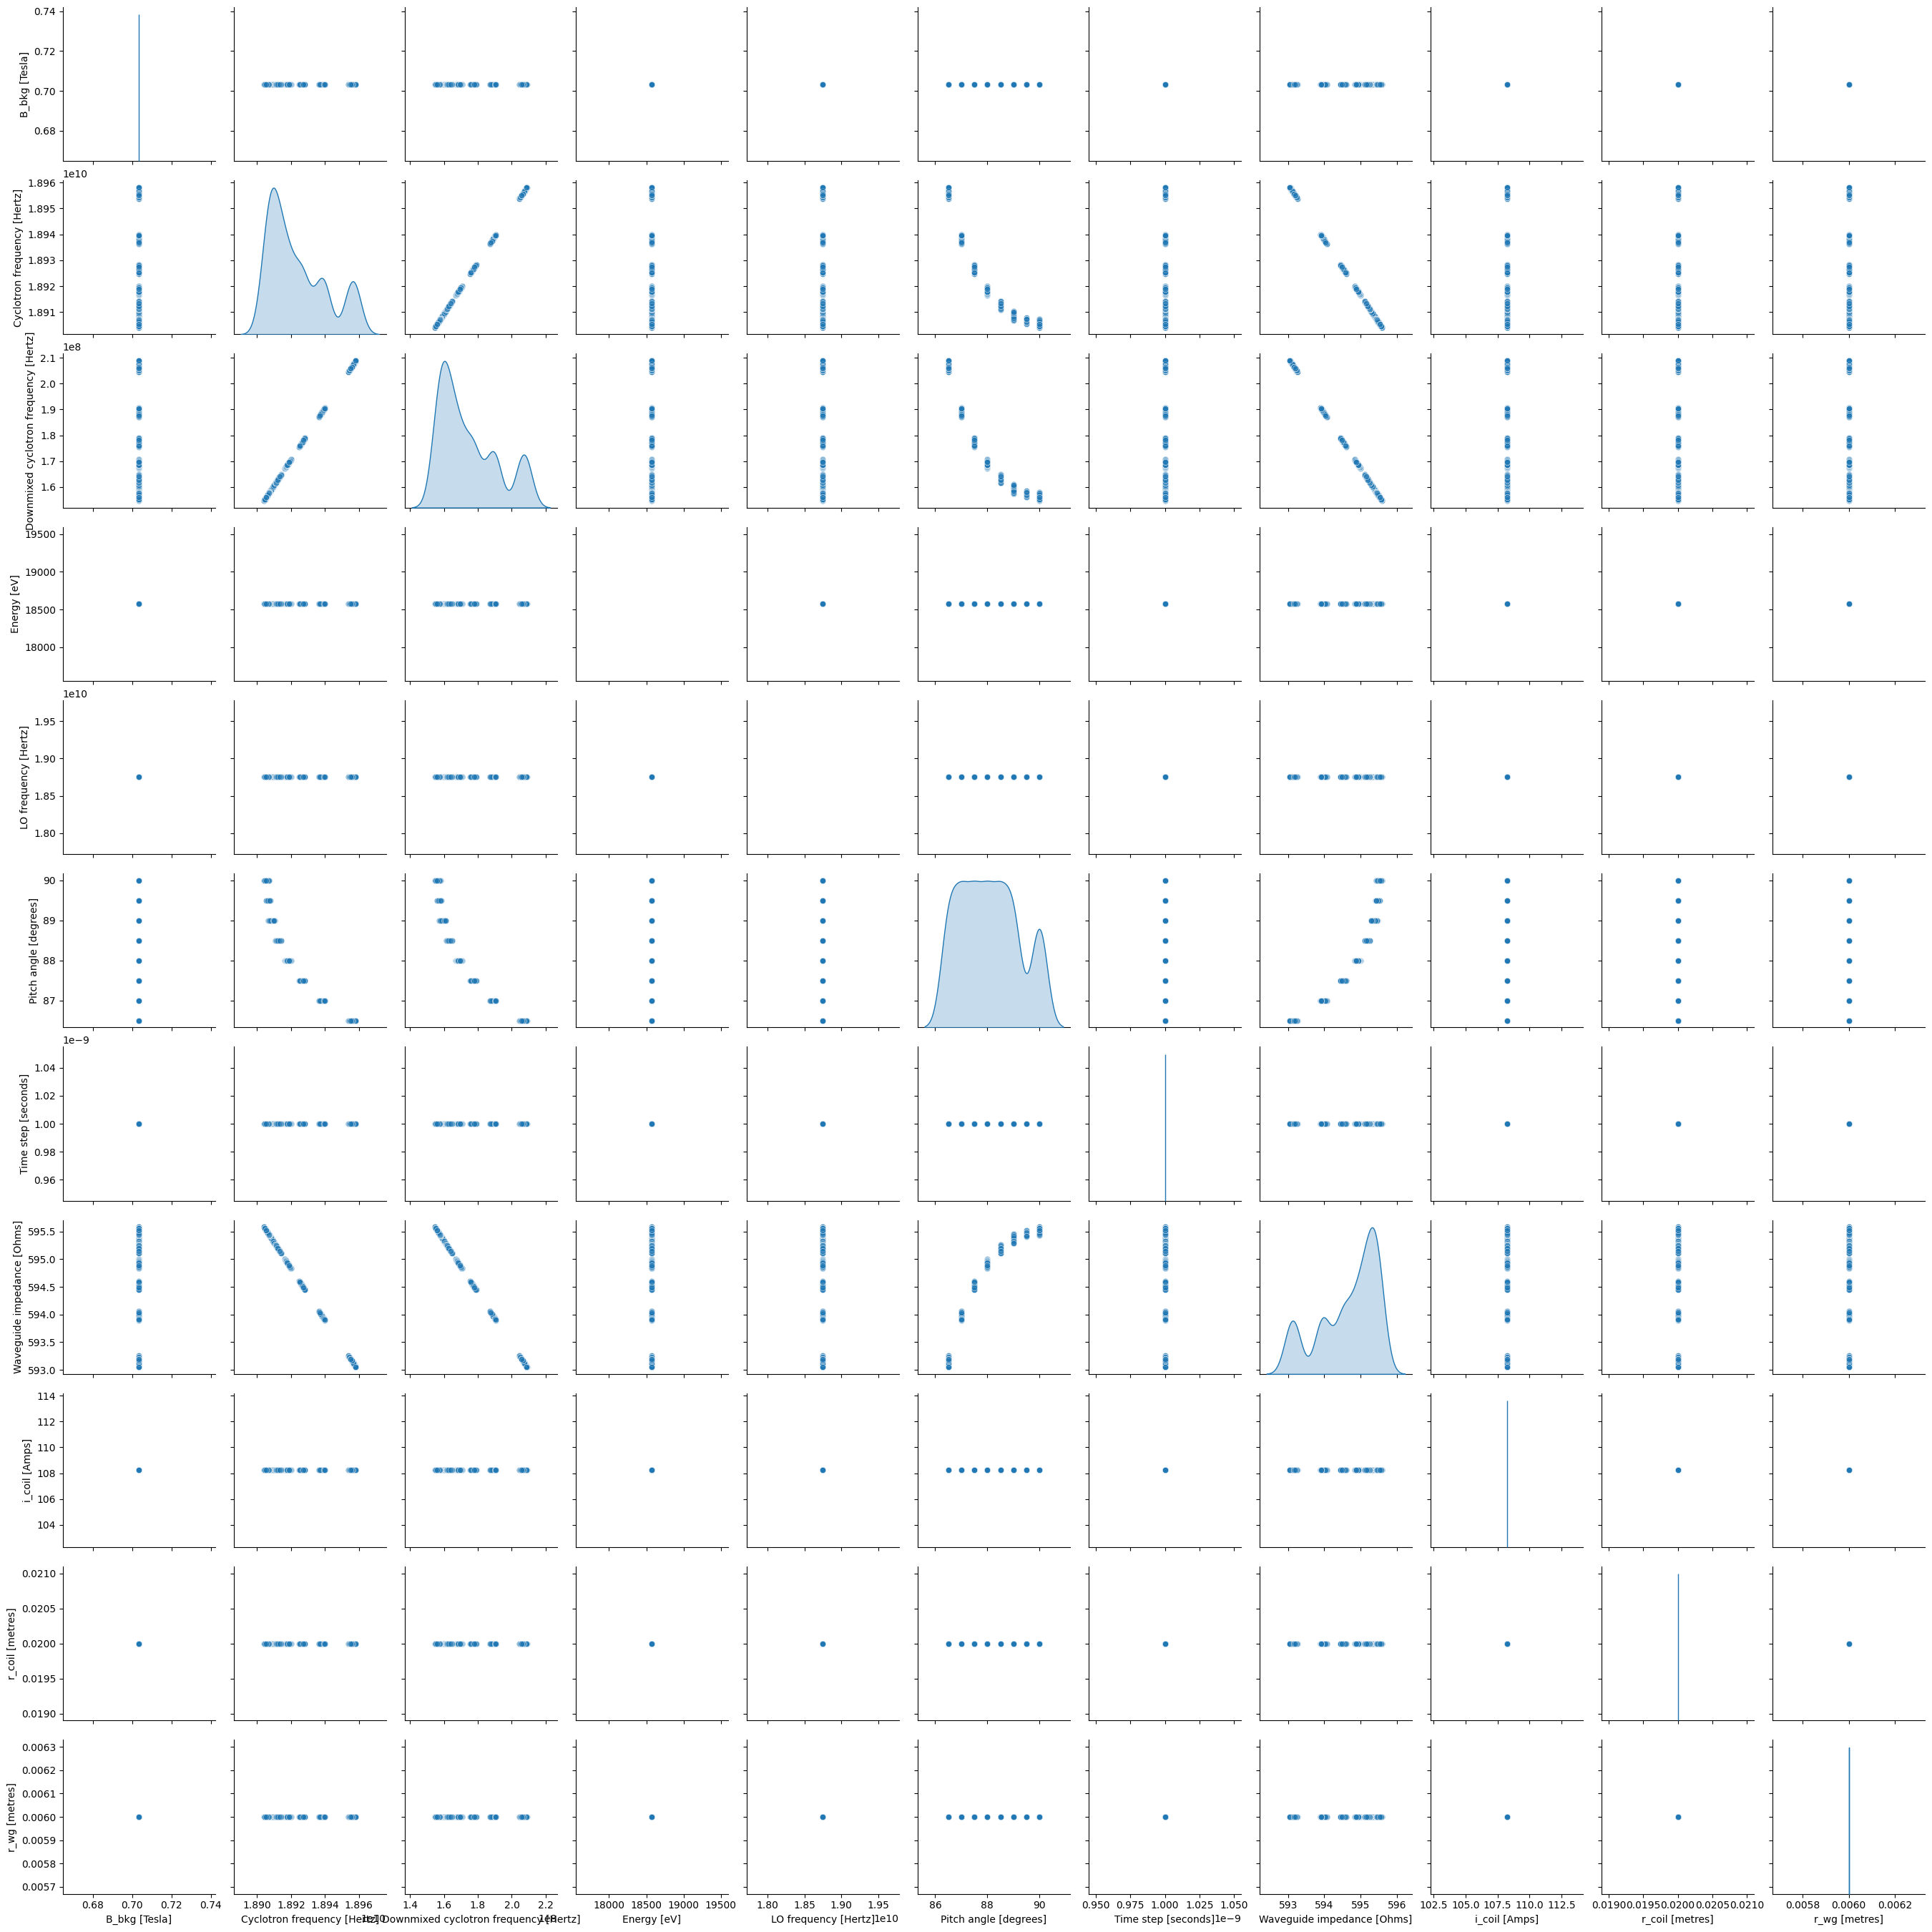

/Users/nathan/miniforge3/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


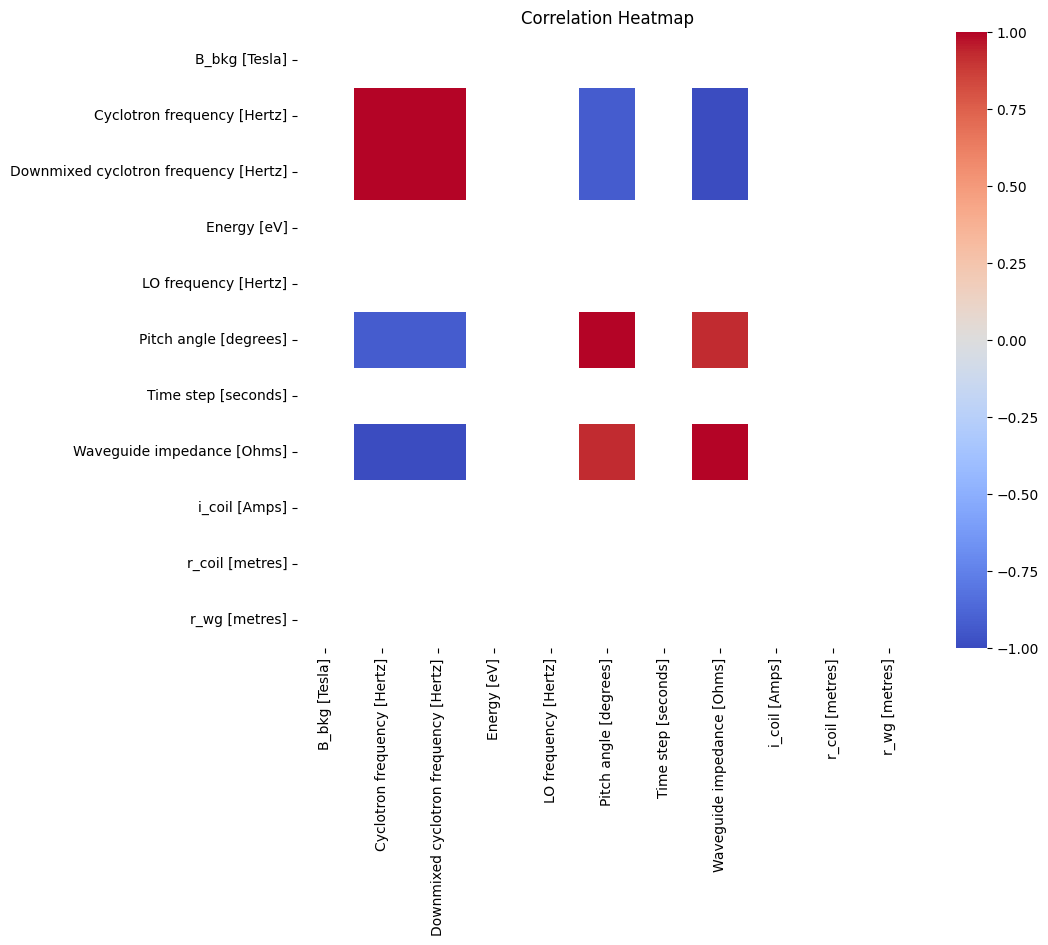

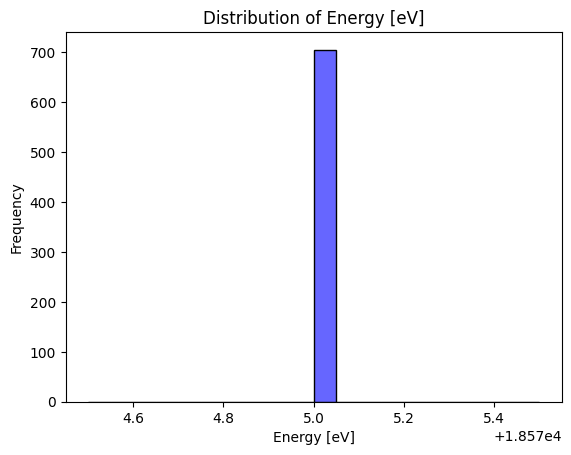

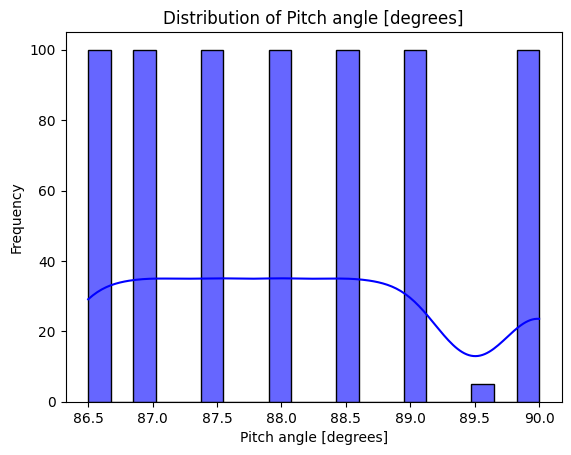

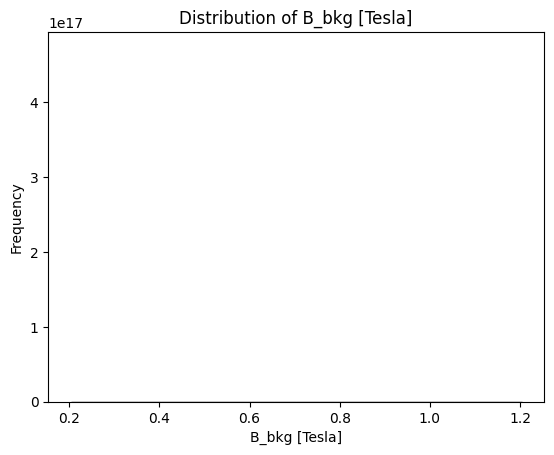

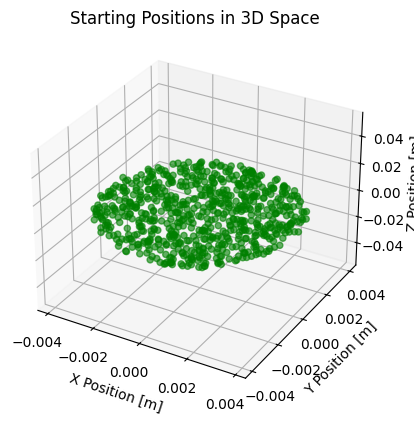

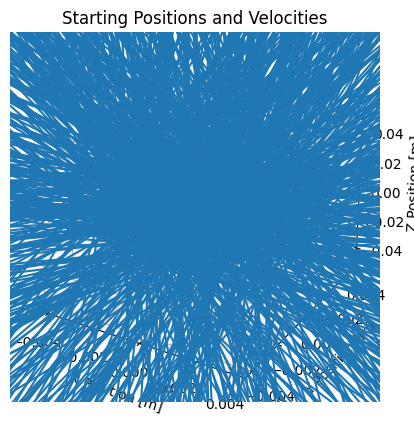

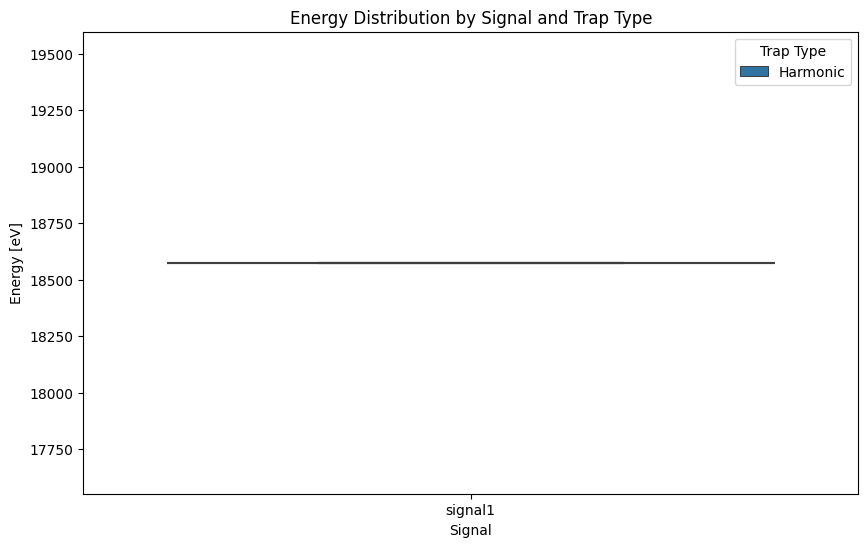

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Pairplot for continuous variables
continuous_cols = [
    'B_bkg [Tesla]', 'Cyclotron frequency [Hertz]', 
    'Downmixed cyclotron frequency [Hertz]', 'Energy [eV]', 
    'LO frequency [Hertz]', 'Pitch angle [degrees]', 
    'Time step [seconds]', 'Waveguide impedance [Ohms]',
    'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]'
]
sns.pairplot(frame[continuous_cols], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.show()

# Correlation heatmap
corr = frame[continuous_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Distribution plots for select variables
for col in ['Energy [eV]', 'Pitch angle [degrees]', 'B_bkg [Tesla]']:
    plt.figure()
    sns.histplot(frame[col], kde=True, bins=20, color='blue', alpha=0.6)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 3D scatter plot for starting positions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
positions = np.array(frame['Starting position [metres]'].tolist())
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='green', alpha=0.6)
ax.set_xlabel('X Position [m]')
ax.set_ylabel('Y Position [m]')
ax.set_zlabel('Z Position [m]')
plt.title('Starting Positions in 3D Space')
plt.show()

# Quiver plot for starting positions and velocities
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
velocities = np.array(frame['Starting velocity [metres/second]'].tolist())
ax.quiver(positions[:, 0], positions[:, 1], positions[:, 2], velocities[:, 0], velocities[:, 1], velocities[:, 2], length=0.1, normalize=True)
ax.set_xlabel('X Position [m]')
ax.set_ylabel('Y Position [m]')
ax.set_zlabel('Z Position [m]')
plt.title('Starting Positions and Velocities')
plt.show()

# Boxplot for categorical comparisons
plt.figure(figsize=(10, 6))
sns.boxplot(data=frame, x='signal', y='Energy [eV]', hue='trap')
plt.title('Energy Distribution by Signal and Trap Type')
plt.ylabel('Energy [eV]')
plt.xlabel('Signal')
plt.legend(title='Trap Type')
plt.show()
